In [2]:
import numpy as np
import numpy as np
import pandas as pd
import loadData
import monteCarloClass
import time

In [3]:
# Publication-ready plot configuration
import matplotlib.pyplot as plt
import matplotlib as mpl

# Font sizes
FONT_SIZE_LABEL = 18  # Axis labels and tick labels
FONT_SIZE_TITLE = 20  # Plot titles
FONT_SIZE_LEGEND = 18  # Legend text

# Configure matplotlib parameters globally
plt.rcParams.update({
    # Font sizes
    'font.size': FONT_SIZE_LABEL,          # Base font size
    'axes.labelsize': FONT_SIZE_LABEL,     # X and Y axis labels
    'axes.titlesize': FONT_SIZE_TITLE,     # Subplot titles
    'xtick.labelsize': FONT_SIZE_LABEL,    # X tick labels
    'ytick.labelsize': FONT_SIZE_LABEL,    # Y tick labels
    'legend.fontsize': FONT_SIZE_LEGEND,   # Legend
    
    # Font family
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    
    # Line widths
    'axes.linewidth': 1.5,                 # Axis border width
    'grid.linewidth': 1.0,                 # Grid line width
    'lines.linewidth': 2.0,                # Plot line width
    'lines.markersize': 8,                 # Default marker size
    
    # Tick parameters
    'xtick.major.width': 1.5,              # X tick width
    'ytick.major.width': 1.5,              # Y tick width
    'xtick.major.size': 6,                 # X tick length
    'ytick.major.size': 6,                 # Y tick length
    
    # Legend
    'legend.frameon': True,                # Legend frame
    'legend.framealpha': 0.8,              # Legend transparency
    'legend.edgecolor': 'black',           # Legend border color
    
    # Figure
    'figure.dpi': 100,                     # Display resolution
    'savefig.dpi': 300,                    # Save resolution for publication
    'savefig.bbox': 'tight',               # Tight bounding box
    'savefig.pad_inches': 0.1,             # Padding when saving
    
    # Grid
    'axes.grid': False,                    # No grid by default
    'grid.alpha': 0.3,                     # Grid transparency if enabled
})

print("✓ Publication-ready plot configuration loaded")
print(f"  - Axis labels/ticks: {FONT_SIZE_LABEL}pt")
print(f"  - Titles: {FONT_SIZE_TITLE}pt")
print(f"  - Save resolution: 300 DPI")

✓ Publication-ready plot configuration loaded
  - Axis labels/ticks: 18pt
  - Titles: 20pt
  - Save resolution: 300 DPI


load models


In [4]:
import os
import json
import glob
import pandas as pd
from pathlib import Path

def load_all_model_results():
    """Load all model fit results from the model_fits directory"""
    results = []
    
    # Find all JSON files in model_fits directory
    json_files = glob.glob("model_fits/**/*.json", recursive=True)



    
    
    for file_path in json_files:
  
        try:
            with open(file_path, 'r') as f:
                result = json.load(f)
            
            # Extract participant ID and model type from filename if not in data
            filename = os.path.basename(file_path)
            parts = filename.replace('.json', '').split('_')
            #print(parts)
            if 'participantID' not in result:
                result['participantID'] = parts[0]

            
            result['modelType'] = parts[1]+"_"+parts[3]
            
            if parts[2]!="LapseFree":
                #print("Lapse fixed model, skipping")
                continue

            # Skip results with specific model types
            excluded_models = ["gaussian_sharedPrior", "fusionOnly_sharedPrior", "probabilityMatching_sharedPrior", "switching_sharedPrior"]
            if any(model in result['modelType'] for model in excluded_models):
                # Skip this result
                os.remove(file_path)
                continue
            

            results.append(result)
            
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    return results

# Load all results
all_results = load_all_model_results()
print(f"Loaded {len(all_results)} model fit results")

# Convert to DataFrame for easier analysis
df_results = pd.DataFrame(all_results)
print(f"Participants: {sorted(df_results['participantID'].unique())}")
print(f"Models: {sorted(df_results['modelType'].unique())}\n number of models in comparison is: {len(df_results['modelType'].unique())} ")


Loaded 78 model fit results
Participants: ['all', 'as', 'dt', 'hh', 'ip', 'ln1', 'ln2', 'mh', 'ml', 'mt', 'oy', 'qs', 'sx']
Models: ['fusionOnlyLogNorm_sharedPrior', 'logLinearMismatch_sharedPrior', 'lognorm_sharedPrior', 'probabilityMatchingLogNorm_sharedPrior', 'selection_sharedPrior', 'switchingFree_sharedPrior']
 number of models in comparison is: 6 


In [5]:
# data, dataName = loadData.loadData("as_all.csv")
# intensityVariable = "deltaDurS"
# sensoryVar = "audNoise"
# standardVar = "standardDur"
# conflictVar = "conflictDur"
# #s
# visualStandardVar = "unbiasedVisualStandardDur"
# visualTestVar = "unbiasedVisualTestDur"
# audioStandardVar = "standardDur"
# audioTestVar = "testDurS"
# # Instantiate the Monte Carlo class
# mc_fitter = monteCarloClass.OmerMonteCarlo(data)
# print("Visual test duration range:", data["recordedDurVisualTest"].min(), "to", data["recordedDurVisualTest"].max())
# # fit parameters
# mc_fitter.nStart = 1 # Number of random starts for optimization
# mc_fitter.nSimul = 100 # small number of simulations for quick test
# mc_fitter.optimizationMethod= "bads"  # Use BADS for optimization
# mc_fitter.modelName = "lognorm"  # Set measurement distribution to Gaussian
# mc_fitter.integrationMethod = "analytical"  # Use numerical integration instead of analytical
# mc_fitter.freeP_c = False  # Allow different prior widths for conflict conditions
# mc_fitter.sharedLambda = False  # Use separate lapse rates for each condition
# mc_fitter.dataName = dataName
# #print("t_min, t_max:", mc_fitter.t_min, mc_fitter.t_max)

participantIds=sorted(df_results['participantID'].unique())
modelTypes=sorted(df_results['modelType'].unique())
nParticipants=len(participantIds)
nModels=len(modelTypes)

import fitSaver
import os
participantID="as"
modelType="fusionOnlyLogNorm"

# simulate



 Load data

In [6]:
# import bootstrapperSaveLoad functions
import matplotlib.pyplot as plt
from bootstrapperSaveLoad import saveBootstrappedParams, loadBootstrappedParams
import loadResults
import os
import json
import seaborn as sns

# PLot the posterior per participants

Functions

In [7]:
from scipy.stats import norm

# --- FUSION MODEL IMPLEMENTATION ---
def fusion_estimate(m_a, m_v, sigma_a, sigma_v):
    """Bayesian optimal integration of auditory and visual measurements."""
    # Calculate weights based on reliabilities (inverse variances)
    w_a = 1 / sigma_a**2
    w_v = 1 / sigma_v**2
    # Compute the fused estimate
    fused_estimate = (w_a * m_a + w_v * m_v) / (w_a + w_v)
    return fused_estimate

# --- CAUSAL INFERENCE MODEL IMPLEMENTATION ---
def p_single(m,sigma,t_min,t_max):
    """p(m | C=2) and Gaussian measurement noise N(m; y, sigma^2)."""
    hi_cdf= norm.cdf((t_max - m) /sigma)
    lo_cdf=norm.cdf((t_min-m)/sigma)
    return (hi_cdf-lo_cdf)/(t_max-t_min)

# Causal inference model for duration estimation
def L_C1(m_a,m_v,sigma_a,sigma_v,t_min,t_max):
    sigma_c_sq = (sigma_a**2 * sigma_v**2) / (sigma_a**2 + sigma_v**2)
    sigma_c = np.sqrt(sigma_c_sq)
    mu_c = (m_a / sigma_a**2 + m_v / sigma_v**2) / (1 / sigma_a**2 + 1 / sigma_v**2)

    hi_cdf = norm.cdf((t_max-mu_c)/sigma_c)
    lo_cdf = norm.cdf((t_min-mu_c)/sigma_c)
    
    expo = np.exp(-(m_a-m_v)**2/(2*(sigma_a**2+sigma_v**2)))
    
    prior = 1/(t_max-t_min)
    return prior * sigma_c/np.sqrt(sigma_a**2 * sigma_v**2) * (hi_cdf-lo_cdf) * expo

def L_C1_no_prior(m_a, m_v, sigma_a, sigma_v):
    """Likelihood of common source without prior and bounding."""
    sigma_c_sq = (sigma_a**2 * sigma_v**2) / (sigma_a**2 + sigma_v**2)
    sigma_c = np.sqrt(sigma_c_sq)
    mu_c = (m_a / sigma_a**2 + m_v / sigma_v**2) / (1 / sigma_a**2 + 1 / sigma_v**2)
    
    expo = np.exp(-(m_a - m_v)**2 / (2 * (sigma_a**2 + sigma_v**2)))
    
    return sigma_c / np.sqrt(sigma_a**2 * sigma_v**2) * expo



def L_C2(m_a,m_v,sigma_a,sigma_v,t_min,t_max):
    """ Likelihood of separate sources: product of two marginal likelihoods 
        two integral over two hidden duration y_a y_v"""
    return p_single(m_a,sigma_a,t_min,t_max) * p_single(m_v,sigma_v,t_min,t_max)


def L_C2_no_prior(m_a, m_v, sigma_a, sigma_v):
    """Likelihood of separate sources without prior and bounding."""
    return norm.pdf(m_a, loc=m_a, scale=sigma_a) * norm.pdf(m_v, loc=m_v, scale=sigma_v)

def posterior_C1(m_a,m_v,sigma_a,sigma_v,p_c,t_min,t_max):
    """ Posterior probability of common cause P(C=1 | m_a,m_v) """
    # Likelihoods under each causal structure
    L1 = L_C1(m_a,m_v,sigma_a,sigma_v,t_min,t_max)
    L2 = L_C2(m_a,m_v,sigma_a,sigma_v,t_min,t_max)


    post_C1= (L1 * p_c) / (L1 * p_c + L2 * (1 - p_c))
    return post_C1

    # # Unnormalized posteriors
    # post_C1_unnorm = L1 * p_c
    # post_C2_unnorm = L2 * (1 - p_c)
    # # Normalization constant
    # norm_const = post_C1_unnorm + post_C2_unnorm
    

    # # Posterior probabilities
    # post_C1 = post_C1_unnorm / norm_const
    # return post_C1


Plot posterior commons liklihoods of common and separate sources

In [8]:
FONT_SIZE_LABEL

18

In [12]:
def plot_likelihood_components(sigma_a=0.3, sigma_v=0.3, p_c=0.5, t_min=0.1, t_max=3, 
                              measurement="log-space", nSimul=2000, axes=None, show_plot=True,
                              show_titles=True, show_xticks=True):
    """
    Plot log L_C1, log L_C2, log likelihood ratio, and posterior across conflict levels.
    Expects axes with 4 subplots.
    """
    conflicts = np.linspace(-0.25, +0.25, 300)
    L1_means = []
    L2_means = []
    post_c_means = []
    log_ratio_means = []
    
    S_a_s = 0.5
    
    for conflict in conflicts:
        S_v_s = S_a_s + conflict
        
        if measurement == "log-space" and S_v_s <= 0:
            L1_means.append(np.nan)
            L2_means.append(np.nan)
            log_ratio_means.append(np.nan)
            post_c_means.append(np.nan)
            continue
        
        # Generate measurements
        if measurement == "log-space":
            m_a_s = np.random.normal(np.log(S_a_s), sigma_a, nSimul)
            m_v_s = np.random.normal(np.log(S_v_s), sigma_v, nSimul)
            t_min_use = np.log(t_min)
            t_max_use = np.log(t_max)
        else:
            m_a_s = np.random.normal(S_a_s, sigma_a, nSimul)
            m_v_s = np.random.normal(S_v_s, sigma_v, nSimul)
            t_min_use = t_min
            t_max_use = t_max
        
        # Calculate likelihoods
        L1 = L_C1(m_a_s, m_v_s, sigma_a, sigma_v, t_min_use, t_max_use)
        L2 = L_C2(m_a_s, m_v_s, sigma_a, sigma_v, t_min_use, t_max_use)
        L1_means.append(np.mean(L1))
        L2_means.append(np.mean(L2))
        
        post_c1 = posterior_C1(m_a_s, m_v_s, sigma_a, sigma_v, p_c, t_min_use, t_max_use)
        post_c_means.append(np.mean(post_c1))
        
        with np.errstate(divide='ignore', invalid='ignore'):
            log_ratio = np.log(L1) - np.log(L2)
            log_ratio_means.append(np.mean(log_ratio))
    
    # Define color palette
    colors = {
        "L1": "#3498db",      # Bright blue
        "L2": "#e74c3c",      # Bright red
        "Ratio": "#f39c12",   # Orange for ratio
        "Posterior": "#2ecc71", # Bright green
        "prior": "#9b59b6"    # Purple for prior line
    }
    
    # Use provided axes or create new figure
    if axes is None and show_plot:
        fig, axes = plt.subplots(4, 1, figsize=(30, 40), dpi=300)
        plt.subplots_adjust(hspace=0.35)
        created_fig = True
    else:
        created_fig = False
    
    if show_plot:
        conflicts_ms = np.array(conflicts) * 1000
        
        # Convert to log-likelihood for plotting
        log_L1_means = np.log(L1_means)
        log_L2_means = np.log(L2_means)
        
        # Plot 1: log L_C1 (Common cause log-likelihood)
        axes[0].plot(conflicts_ms, log_L1_means, color=colors["L1"], linewidth=2.5, label='log L(C=1)')
        axes[0].fill_between(conflicts_ms, np.nanmin(log_L1_means), log_L1_means, alpha=0.15, color=colors["L1"])
        axes[0].set_ylabel('log L(C=1)')
        if show_titles:
            axes[0].set_title('Common Cause Log-Likelihood', pad=10)
        axes[0].axvline(0, color='gray', linestyle='--', alpha=0.6, linewidth=1)
        axes[0].grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
        axes[0].spines['top'].set_visible(False)
        axes[0].spines['right'].set_visible(False)
        
        # Plot 2: log L_C2 (Separate causes log-likelihood)
        axes[1].plot(conflicts_ms, log_L2_means, color=colors["L2"], linewidth=2.5, label='log L(C=2)')
        axes[1].fill_between(conflicts_ms, np.nanmin(log_L2_means), log_L2_means, alpha=0.15, color=colors["L2"])
        axes[1].set_ylabel('log L(C=2)')
        if show_titles:
            axes[1].set_title('Separate Causes Log-Likelihood', pad=10)
        axes[1].axvline(0, color='gray', linestyle='--', alpha=0.6, linewidth=1)
        axes[1].grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
        axes[1].spines['top'].set_visible(False)
        axes[1].spines['right'].set_visible(False)
        
        # Plot 3: Log likelihood ratio log(L_C1 / L_C2)
        axes[2].plot(conflicts_ms, log_ratio_means, color=colors["Ratio"], linewidth=3, label='log(L(C=1)/L(C=2))')
        axes[2].fill_between(conflicts_ms, 0, log_ratio_means, alpha=0.15, color=colors["Ratio"])
        axes[2].axhline(0, color='gray', linestyle='--', alpha=0.6, linewidth=1, label='Equal likelihood')
        axes[2].axvline(0, color='gray', linestyle='--', alpha=0.6, linewidth=1)
        axes[2].set_ylabel('log(L(C=1)/L(C=2))')
        if show_titles:
            axes[2].set_title('Log Likelihood Ratio', pad=10)
        axes[2].grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
        axes[2].spines['top'].set_visible(False)
        axes[2].spines['right'].set_visible(False)
        
        # Plot 4: Posterior P(C=1)
        axes[3].plot(conflicts_ms, post_c_means, color=colors["Posterior"], linewidth=3, label='P(C=1 | data)')
        axes[3].fill_between(conflicts_ms, 0, post_c_means, alpha=0.15, color=colors["Posterior"])
        axes[3].axhline(0.5, color='gray', linestyle='--', alpha=0.6, linewidth=1, label='Chance')
        axes[3].axhline(p_c, color=colors["prior"], linestyle=':', alpha=0.8, linewidth=2, label=f'Prior p_c={p_c:.2f}')
        axes[3].axvline(0, color='gray', linestyle='--', alpha=0.6, linewidth=1)
        axes[3].set_ylabel('P(C=1 | data)')
        if show_titles:
            axes[3].set_title('Posterior Common Cause', pad=10)
        axes[3].set_ylim([0, 1])
        axes[3].grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
        axes[3].spines['top'].set_visible(False)
        axes[3].spines['right'].set_visible(False)
        
        # Add parameter info box to posterior plot
        param_text = f'$\\sigma_a$={sigma_a:.2f}, $\\sigma_v$={sigma_v:.2f}'
        axes[3].text(0.98, 0.05, param_text, transform=axes[3].transAxes, fontsize=9,
                    verticalalignment='bottom', horizontalalignment='right',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))
        
        # Set or hide x-axis ticks for all subplots
        if show_xticks:
            x_ticks = [-250, -167, -83, 0, 83, 167, 250]
            x_tick_labels = ['-250', '-167', '-83', '0', '83', '167', '250']
            for ax in axes:
                ax.set_xticks(x_ticks)
                ax.set_xticklabels(x_tick_labels)
                ax.tick_params(axis='both', which='major', labelsize=18)
        else:
            for ax in axes:
                ax.set_xticks([])
                ax.set_xticklabels([])
        
        if created_fig:
            plt.tight_layout()
    
    return conflicts, L1_means, L2_means, post_c_means

def plotPosteriorsPerSubj(participantIds, modelTypes, parameterToPLot="mu"):
    lenSubjs = len(participantIds)
    nNoiseLevels = 2  # low and high noise
    nPlotsPerNoise = 4  # L1, L2, Ratio, Posterior

    # Create figure and axes grid
    fig, axes = plt.subplots(
        lenSubjs, nNoiseLevels * nPlotsPerNoise,
        figsize=(5 * nNoiseLevels * nPlotsPerNoise, 4 * lenSubjs),
        dpi=300,
        squeeze=False
    )
    plt.subplots_adjust(hspace=0.4, wspace=0.3, top=0.95)

    # Ensure axes is 2D even for single subject
    if lenSubjs == 1:
        axes = axes.reshape(1, -1)

    for pNum, participantID in enumerate(participantIds):
        for j, audioNoiseLevel in enumerate([0.1, 1.2]):
            modelType = "lognorm"
            # Load data and fit results
            data, dataName = loadData.loadData(participantID+"_all.csv", verbose=False)
            mc_fitter = monteCarloClass.OmerMonteCarlo(data)
            t_min_data = mc_fitter.data_t_min
            t_max_data = mc_fitter.data_t_max
            mc_fitter.modelName = modelType
            mc_fitter.freeP_c = False
            mc_fitter.sharedLambda = False
            mc_fitter.dataName = dataName 
            res = loadResults.loadFitResults(mc_fitter, dataName, modelName=mc_fitter.modelName)
            mc_fitter.modelFit = res['fittedParams']

            sigma_v = mc_fitter.modelFit[2]
            p_c = mc_fitter.modelFit[3]

            if audioNoiseLevel == 0.1:
                sigma_a = mc_fitter.modelFit[1]
                noise_label = "Low Noise"
            elif audioNoiseLevel == 1.2:
                sigma_a = mc_fitter.modelFit[4]
                noise_label = "High Noise"

            # Create axes for this noise level (4 subplots)
            start_col = j * nPlotsPerNoise
            subplot_axes = [axes[pNum, start_col + k] for k in range(nPlotsPerNoise)]

            # Only show titles and x-ticks on the first row
            first_row = (pNum == 0)

            # Call plotting function with specific axes
            plot_likelihood_components(
                sigma_a=sigma_a, 
                sigma_v=sigma_v, 
                p_c=p_c, 
                t_min=t_min_data, 
                t_max=t_max_data, 
                measurement="log-space",
                axes=subplot_axes,
                show_plot=True,
                show_titles=first_row,
                show_xticks=first_row
            )
            # Add row/condition title only for first row
            if first_row:
                subplot_axes[0].set_title(
                    f"{participantID.upper()} | {noise_label}\n{subplot_axes[0].get_title()}",
                    color='#2c3e50',
                    fontsize=FONT_SIZE_TITLE,
                    pad=15
                )
                # Add centered x-label to middle columns (between col 1 and 2)
                subplot_axes[1].set_xlabel('Conflict Level (ms)', fontsize=FONT_SIZE_LABEL)

    # Add overall title with smaller font
    plt.suptitle("Log-Likelihood, Ratio & Posterior per Subject", fontsize=FONT_SIZE_TITLE, y=0.995, color='#2c3e50')
    plt.tight_layout()
    plt.show()

# Run the improved plot
plotPosteriorsPerSubj(participantIds[1:], modelTypes, parameterToPLot="mu")

# Figure caption
# This figure illustrates the components of the causal inference model for each participant under low and high auditory noise conditions.
# Left block of four plots per participant shows results for low auditory noise, while the right block shows high auditory noise.
# Each block contains Log-likelihood of common cause (log L(C=1)), Log-likelihood of separate causes (log L(C=2)),
# Log likelihood ratio (log L(C=1)/L(C=2)), and Posterior probability of common cause (P(C=1 | data)), from left to right.
# The log-likelihoods and posteriors are computed as function of conflict level and the sensory noise estimates derived from the participant-specific model fits under the log-normal measurement assumption with model averaging causal inference strategy.


**Figure caption:** Log likelihood ratio and posterior probability of a common cause as a function of audiovisual conflict for each participant. Columns are grouped by auditory noise condition: the left pair shows low noise and the right pair shows high noise. For each condition, the first column displays the log likelihood ratio $\log\bigl(L(C{=}1)/L(C{=}2)\bigr)$, where values above zero favour a common-cause interpretation. The second column shows the posterior probability of a common cause, $P(C{=}1 \mid \text{data})$, with the dotted purple line indicating the fitted prior $p_c$. Both quantities are computed via Monte Carlo sampling using participant-specific sensory noise parameters ($\sigma_a$, $\sigma_v$) and common-cause prior ($p_c$) estimated under the log-normal causal inference averaging model.

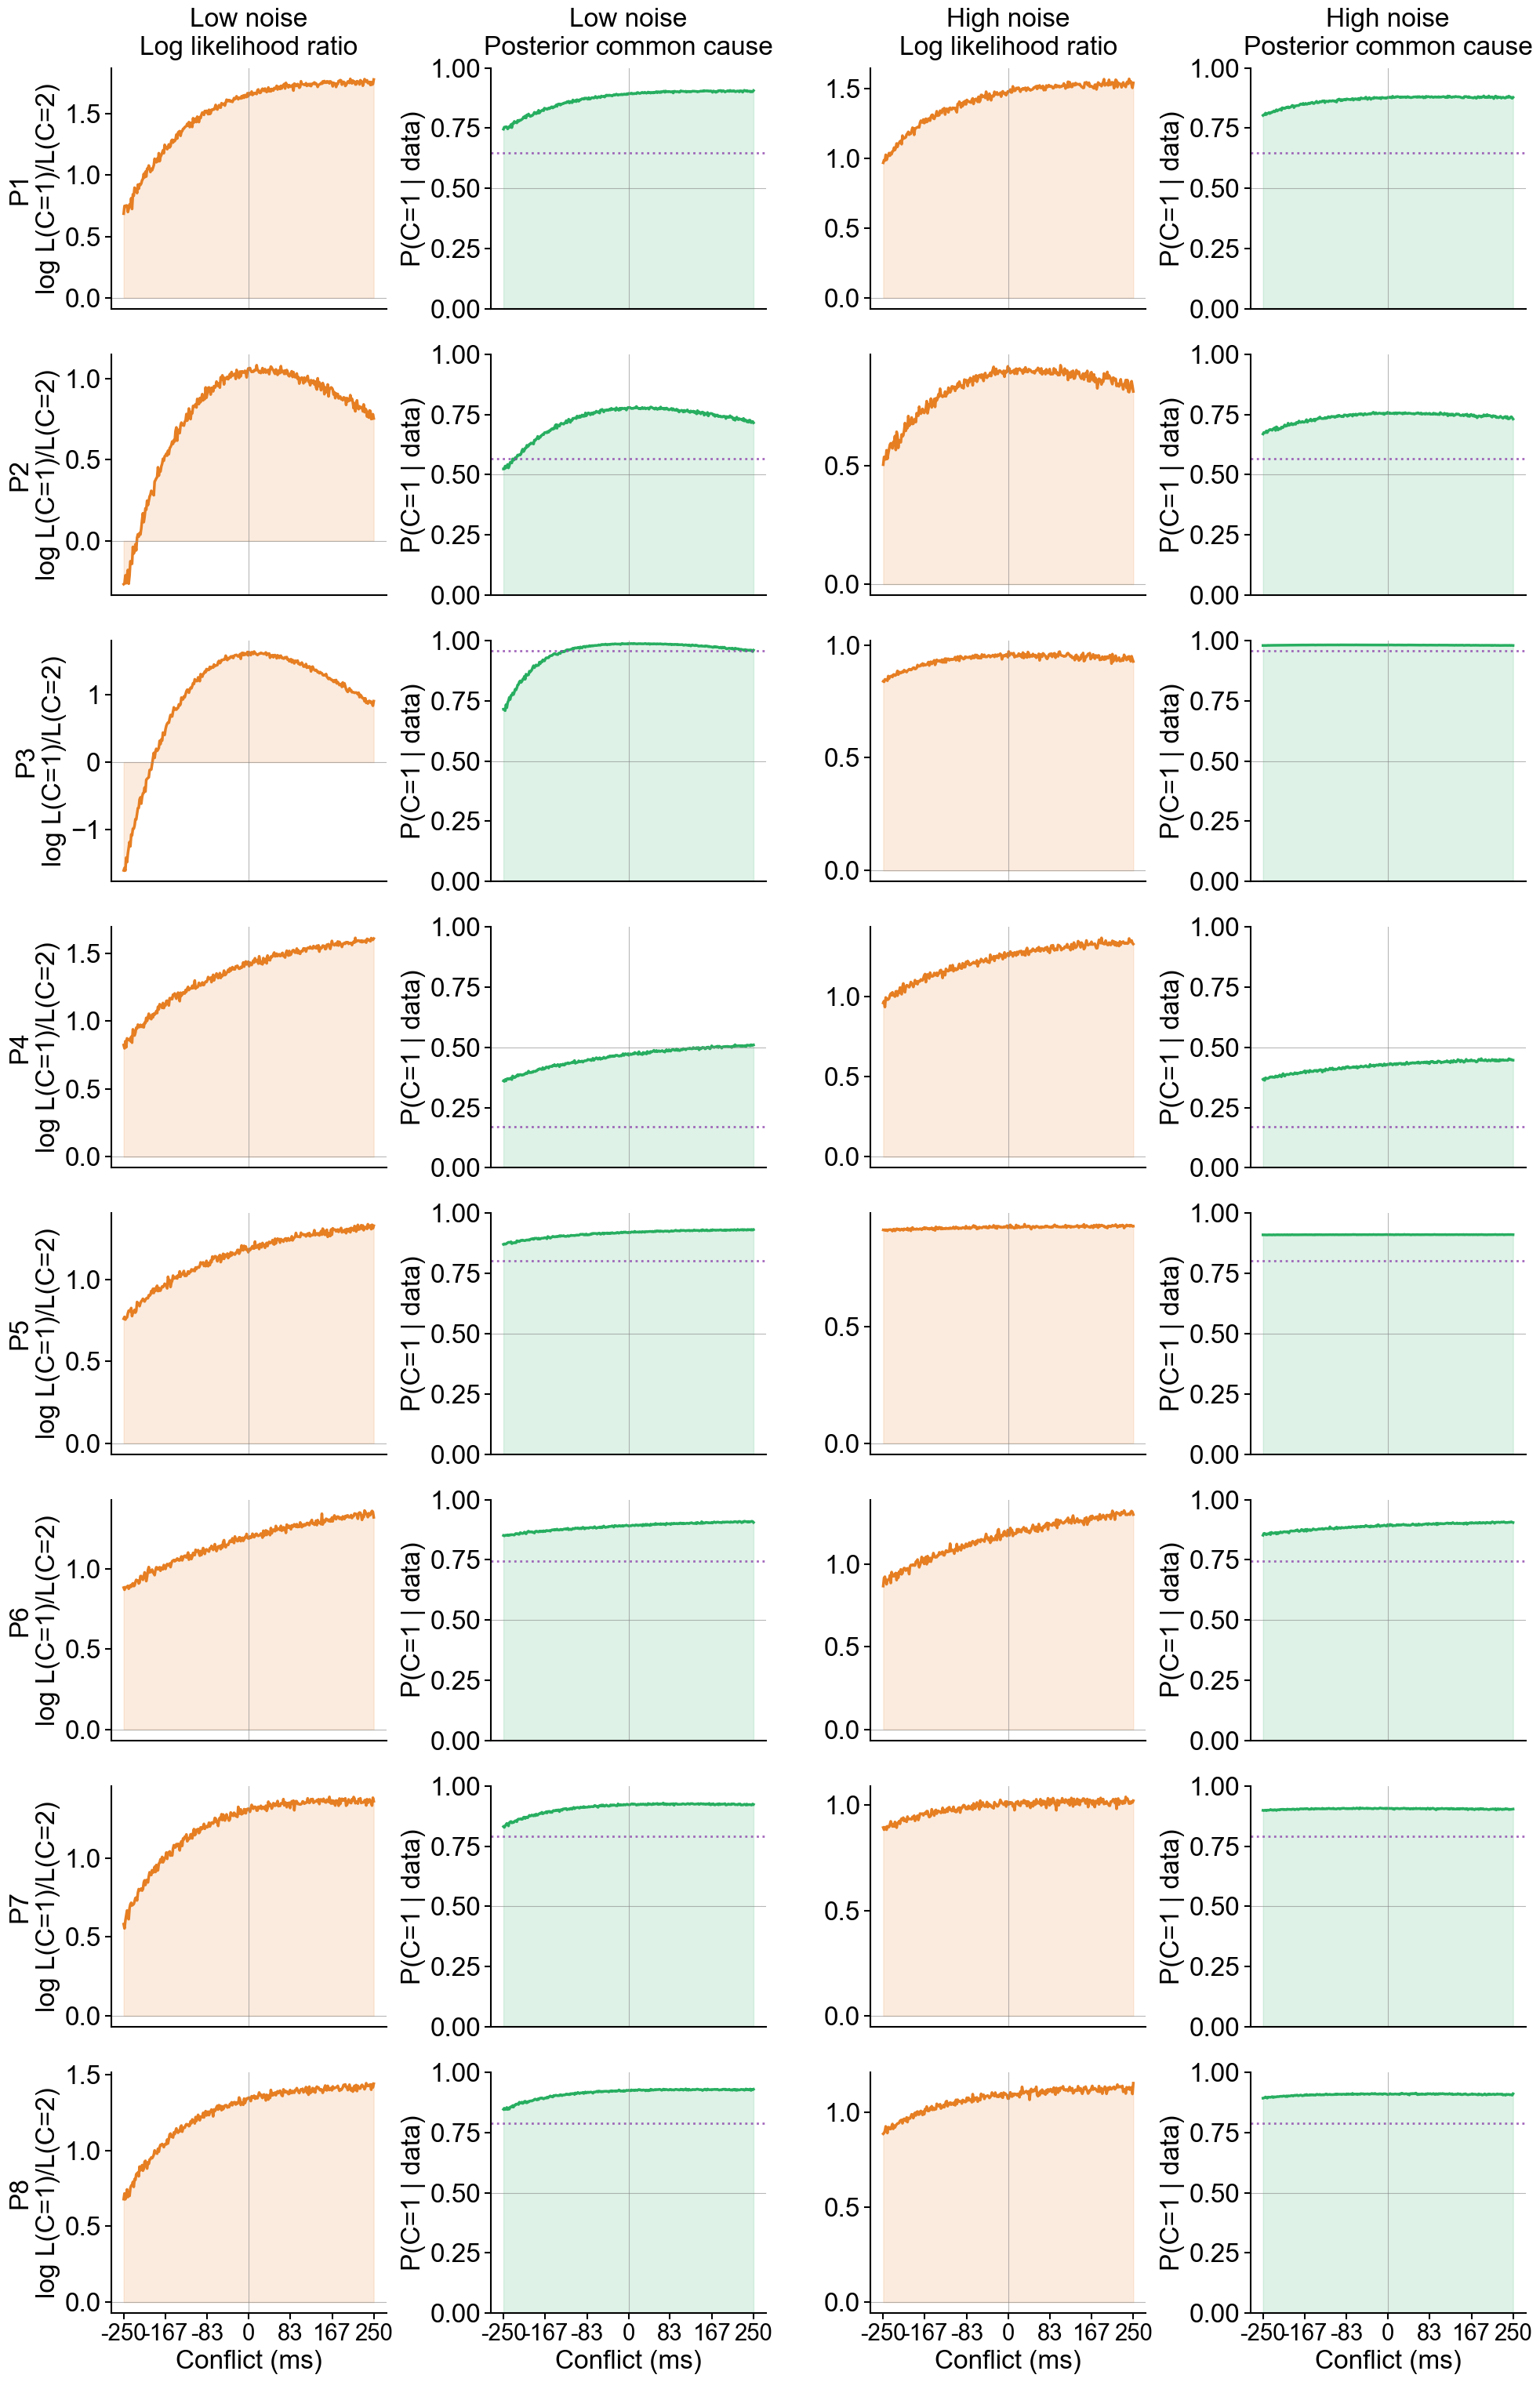

In [21]:

FONTSIZE = 24

def plot_ratio_and_posterior(sigma_a=0.3, sigma_v=0.3, p_c=0.5, t_min=0.1, t_max=3,
                             measurement="log-space", nSimul=2000, axes=None,
                             show_titles=True, show_xlabel=True):
    """
    Plot log likelihood ratio and posterior P(C=1) across conflict levels.
    Expects axes with 2 subplots [ratio_ax, posterior_ax].
    """
    conflicts = np.linspace(-0.25, +0.25, 300)
    post_c_means = []
    log_ratio_means = []

    S_a_s = 0.5

    for conflict in conflicts:
        S_v_s = S_a_s + conflict

        if measurement == "log-space" and S_v_s <= 0:
            log_ratio_means.append(np.nan)
            post_c_means.append(np.nan)
            continue

        if measurement == "log-space":
            m_a_s = np.random.normal(np.log(S_a_s), sigma_a, nSimul)
            m_v_s = np.random.normal(np.log(S_v_s), sigma_v, nSimul)
            t_min_use, t_max_use = np.log(t_min), np.log(t_max)
        else:
            m_a_s = np.random.normal(S_a_s, sigma_a, nSimul)
            m_v_s = np.random.normal(S_v_s, sigma_v, nSimul)
            t_min_use, t_max_use = t_min, t_max

        L1 = L_C1(m_a_s, m_v_s, sigma_a, sigma_v, t_min_use, t_max_use)
        L2 = L_C2(m_a_s, m_v_s, sigma_a, sigma_v, t_min_use, t_max_use)

        post_c1 = posterior_C1(m_a_s, m_v_s, sigma_a, sigma_v, p_c, t_min_use, t_max_use)
        post_c_means.append(np.mean(post_c1))

        with np.errstate(divide='ignore', invalid='ignore'):
            log_ratio = np.log(L1) - np.log(L2)
            log_ratio_means.append(np.mean(log_ratio))

    conflicts_ms = np.array(conflicts) * 1000

    # --- Plot 1: Log likelihood ratio ---
    ax_r = axes[0]
    ax_r.plot(conflicts_ms, log_ratio_means, color='#e67e22', linewidth=2.5)
    ax_r.fill_between(conflicts_ms, 0, log_ratio_means, alpha=0.15, color='#e67e22')
    ax_r.axhline(0, color='#888888', linestyle='-', linewidth=0.8, alpha=0.6)
    ax_r.axvline(0, color='#888888', linestyle='-', linewidth=0.8, alpha=0.6)

    if show_titles:
        ax_r.set_title('Log likelihood ratio', fontsize=FONTSIZE, pad=10)
    ax_r.spines['top'].set_visible(False)
    ax_r.spines['right'].set_visible(False)
    ax_r.tick_params(axis='both', labelsize=FONTSIZE)

    # --- Plot 2: Posterior P(C=1) ---
    ax_p = axes[1]
    ax_p.plot(conflicts_ms, post_c_means, color='#27ae60', linewidth=2.5)
    ax_p.fill_between(conflicts_ms, 0, post_c_means, alpha=0.15, color='#27ae60')
    ax_p.axhline(0.5, color='#888888', linestyle='-', linewidth=0.8, alpha=0.6)
    ax_p.axhline(p_c, color='#8e44ad', linestyle=':', linewidth=2, alpha=0.8)
    ax_p.axvline(0, color='#888888', linestyle='-', linewidth=0.8, alpha=0.6)
    ax_p.set_ylabel('P(C=1 | data)', fontsize=FONTSIZE)
    if show_titles:
        ax_p.set_title('Posterior common cause', fontsize=FONTSIZE, pad=10)
    ax_p.set_ylim([0, 1])
    ax_p.spines['top'].set_visible(False)
    ax_p.spines['right'].set_visible(False)
    ax_p.tick_params(axis='both', labelsize=FONTSIZE)

    # x-axis
    if show_xlabel:
        x_ticks = [-250, -167, -83, 0, 83, 167, 250]
        for ax in axes:
            ax.set_xticks(x_ticks)
            ax.set_xticklabels([str(t) for t in x_ticks], fontsize=FONTSIZE-3)
        axes[0].set_xlabel('Conflict (ms)', fontsize=FONTSIZE)
        axes[1].set_xlabel('Conflict (ms)', fontsize=FONTSIZE)
    else:
        for ax in axes:
            ax.set_xticks([])
            ax.set_xticklabels([])


def plotPosteriorsPerSubj(participantIds, modelTypes, parameterToPLot="mu"):
    lenSubjs = len(participantIds)
    nNoiseLevels = 2
    nPlotsPerNoise = 2  # ratio + posterior only

    n_cols = nNoiseLevels * nPlotsPerNoise  # 4 columns total
    fig, axes = plt.subplots(
        lenSubjs, n_cols,
        figsize=(5 * n_cols, 4 * lenSubjs),
        squeeze=False
    )
    plt.subplots_adjust(hspace=0.35, wspace=0.35, top=0.94)

    noise_labels = {0.1: "Low noise", 1.2: "High noise"}

    for pNum, participantID in enumerate(participantIds):
        for j, audioNoiseLevel in enumerate([0.1, 1.2]):
            # Load data and fit
            data, dataName = loadData.loadData(participantID + "_all.csv", verbose=False)
            mc_fitter = monteCarloClass.OmerMonteCarlo(data)
            mc_fitter.modelName = "lognorm"
            mc_fitter.freeP_c = False
            mc_fitter.sharedLambda = False
            mc_fitter.dataName = dataName
            res = loadResults.loadFitResults(mc_fitter, dataName, modelName=mc_fitter.modelName)
            mc_fitter.modelFit = res['fittedParams']

            sigma_v = mc_fitter.modelFit[2]
            p_c = mc_fitter.modelFit[3]
            sigma_a = mc_fitter.modelFit[1] if audioNoiseLevel == 0.1 else mc_fitter.modelFit[4]

            start_col = j * nPlotsPerNoise
            subplot_axes = [axes[pNum, start_col + k] for k in range(nPlotsPerNoise)]

            is_first_row = (pNum == 0)
            is_last_row = (pNum == lenSubjs - 1)

            plot_ratio_and_posterior(
                sigma_a=sigma_a, sigma_v=sigma_v, p_c=p_c,
                t_min=mc_fitter.data_t_min, t_max=mc_fitter.data_t_max,
                measurement="log-space",
                axes=subplot_axes,
                show_titles=is_first_row,
                show_xlabel=is_last_row
            )

            # Add participant + noise label on the left-most column of each noise block
            noise_label = noise_labels[audioNoiseLevel]
            if is_first_row:
                current_title = subplot_axes[0].get_title()
                subplot_axes[0].set_title(
                    f"{noise_label}\n{current_title}",
                    fontsize=FONTSIZE, pad=12
                )
                current_title_p = subplot_axes[1].get_title()
                subplot_axes[1].set_title(
                    f"{noise_label}\n{current_title_p}",
                    fontsize=FONTSIZE, pad=12
                )

        # Add participant label on y-axis of leftmost column
        axes[pNum, 0].set_ylabel(f'P{pNum+1}\nlog L(C=1)/L(C=2)', fontsize=FONTSIZE)
        if pNum == lenSubjs//2 - 1:
            axes[pNum, 0].set_ylabel(f'P{pNum+1}\nlog L(C=1)/L(C=2)', fontsize=FONTSIZE)

    plt.tight_layout(rect=(0, 0, 1, 0.96))
    fig.savefig("posterior_ratio_per_subject.png", dpi=600, format='png', bbox_inches='tight')
    plt.show()

# Run
plotPosteriorsPerSubj(participantIds[1:9], modelTypes, parameterToPLot="mu")
